## Machine Learning Project, University of Milan
**Date:** May 2024  
**Student:** Fatemeh Jandari

### Ridge Regression

**Objective:** Download the Spotify Tracks Dataset and perform ridge regression to predict the tracks’ popularity. Note that this dataset contains both numerical and categorical features. 

**Guidelines:**
1. **First Phase:**
   - Train the model using only the **numerical features**.
   
2. **Second Phase:**
   - Appropriately handle the **categorical features** (for example, with one-hot encoding or other techniques) and use them together with the numerical ones to train the model.
   
3. **Training Parameters:**
   - Experiment with different training parameters.
   
4. **Validation:**
   - Use **5-fold cross-validation** to compute your risk estimates.
   
5. **Discussion:**
   - Thoroughly discuss and compare the performance of the model.

**Implementation Requirements:**
- Implement the code for the ridge regression from scratch (without using libraries, such as Scikit-learn). It is not mandatory to do so for the implementation of the 5-fold cross-validation.

Library Import:

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
import category_encoders as ce
%matplotlib inline

### <u>Explanitory Data Analysis</u> (EDA)


In [2]:
SP_Data = pd.read_csv("./spotify.csv")
SP_Data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
# 1. Check if there is any NaN values in the dataset
SP_Data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
SP_Data[SP_Data.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [5]:
# Drop the first column 'Unnamed: 0' and removing NaN records
SP_Data = SP_Data.drop(columns='Unnamed: 0', axis=1).dropna()

In [6]:
# Retrieve statistical information from numerical features in the dataset:
SP_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996
instrumentalness,113999.0,0.156051,0.309556,0.000,0.0000,0.000042,0.0490,1.000


In [7]:
# categorical features statistics
SP_Data.describe(include=['bool', 'object']).T

,count,unique,top,freq
track_id,113999,89740,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
explicit,113999,2,False,104252
track_genre,113999,114,acoustic,1000


In [8]:
# Data types and count info for all features
SP_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

Handling duplicated records

In [9]:
# 'track_id' column should not have any duplicates. hens, we check:
SP_Data.loc[SP_Data.duplicated(subset="track_id"), "track_id"].unique()

array(['0CDucx9lKxuCZplLXUz0iX', '2aibwv5hGXSgw7Yru8IYTO',
       '5E30LdtzQTGqRvNd7l6kG5', ..., '71dLJx3qHOTQMTvvoE2dmd',
       '6OG5TBCmuTOuWCzSGsETrE', '7xsirhcgFWOnItsGuBfrv9'], dtype=object)

In [10]:
noDup_Data = SP_Data.drop_duplicates(subset='track_id', keep='last')
newSP_Data = pd.get_dummies(noDup_Data, columns=['track_genre'], dtype=int).drop(columns="track_id")
newSP_Data.shape

(89740, 131)

In [11]:
# genre_dataframe = pd.get_dummies(SP_Data[["track_id", "track_genre"]], columns=['track_genre'], dtype=int)
# trakGen_dataframe = genre_dataframe.groupby('track_id', as_index=False).sum()
# NoTrakGen_df = SP_Data.drop(columns=['track_genre']).drop_duplicates(subset=['track_id'])
# newSP_Data = pd.merge(NoTrakGen_df, trakGen_dataframe, on=['track_id'], how='inner').drop(columns="track_id")
# newSP_Data

Visualy checking for <u>outliers</u> with boxplots

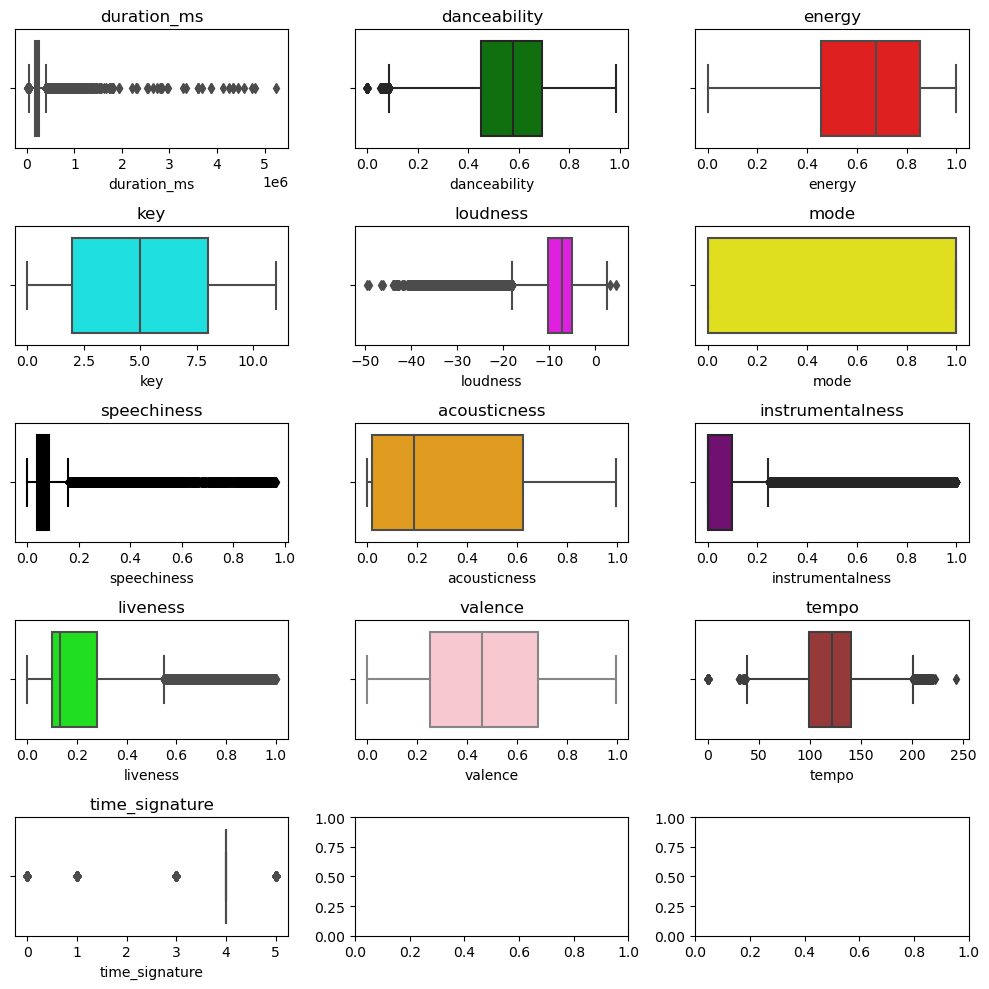

In [12]:
num_rows = 5
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

columns_of_interest = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]

boxplot_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'lime', 'pink', 'brown', 'gray']

for index, column in enumerate(columns_of_interest):
    row_index = index // num_cols
    col_index = index % num_cols
    sns.boxplot(x=newSP_Data[column], ax=axes[row_index, col_index], color=boxplot_colors[index])
    axes[row_index, col_index].set_title(column)

plt.tight_layout()
plt.show()

Assess the distribution and skewness of the numerical features

In [13]:
from scipy.stats import skew
numerical_columns = newSP_Data.select_dtypes(include=["int64", "float64"]).columns

popularity skewness is : 0.07121540730658313


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


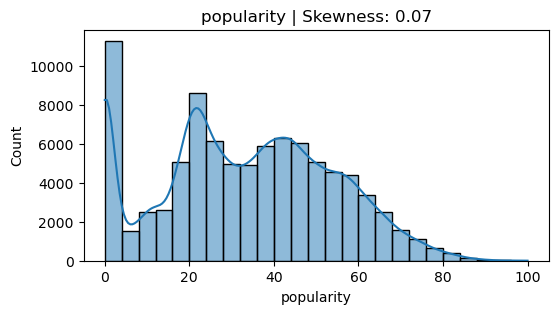

duration_ms skewness is : 11.0726156295667


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


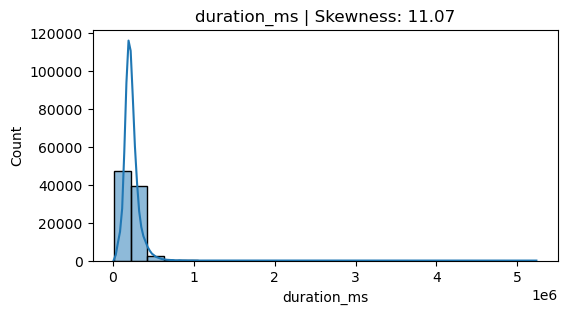

danceability skewness is : -0.39828514872857834


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


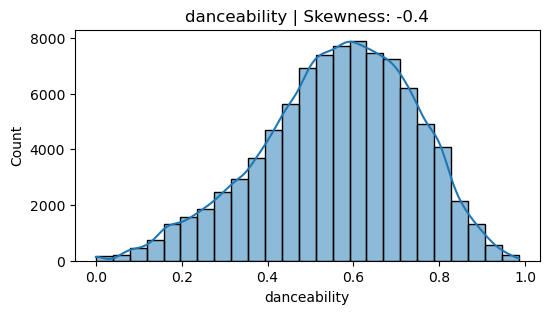

energy skewness is : -0.559983178384231


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


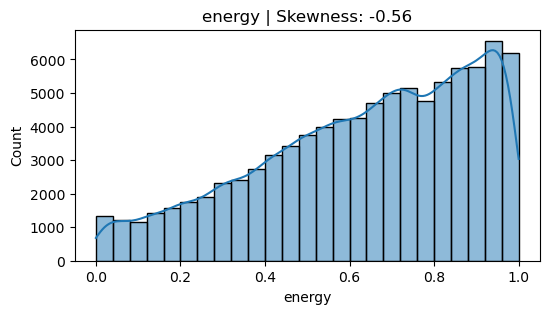

key skewness is : -0.0001422657976223642


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


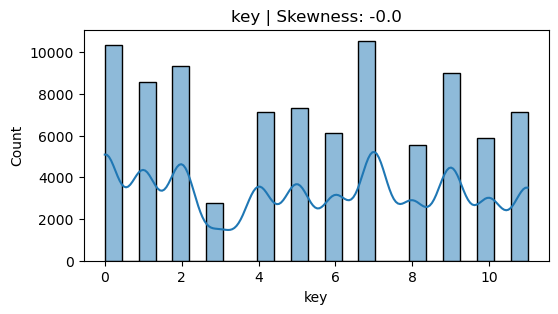

loudness skewness is : -1.9598466264554115


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


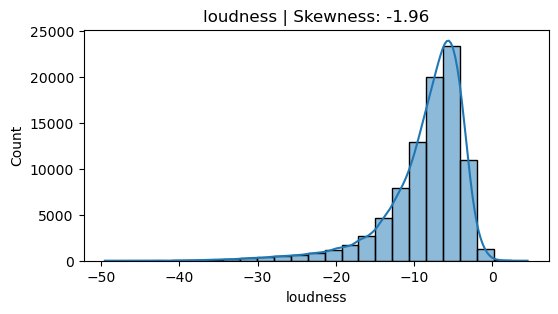

mode skewness is : -0.5696874208096168


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


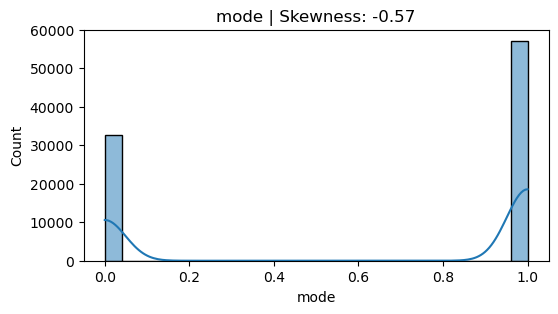

speechiness skewness is : 4.545758523059013


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


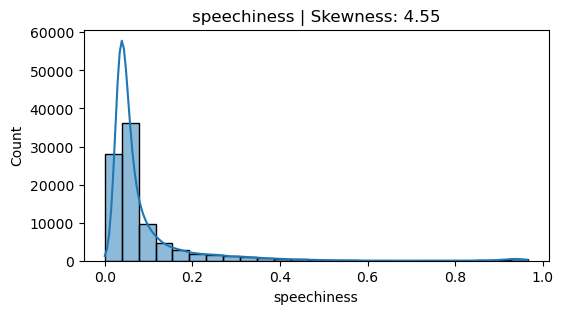

acousticness skewness is : 0.6557607431382175


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


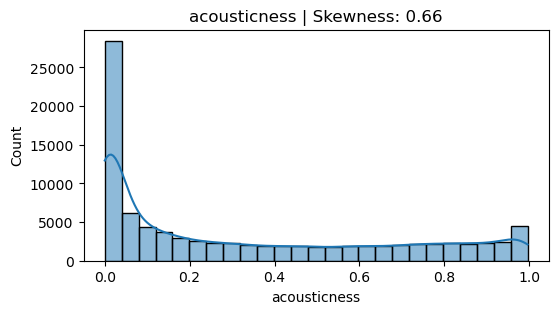

instrumentalness skewness is : 1.5639705119679563


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


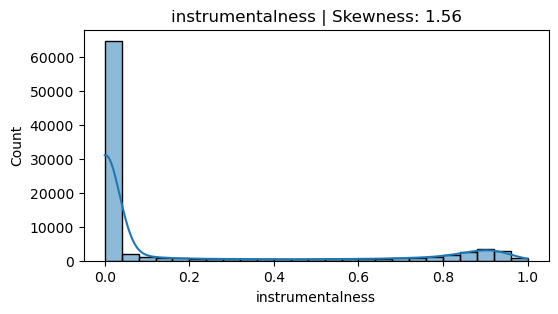

liveness skewness is : 2.062057937592166


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


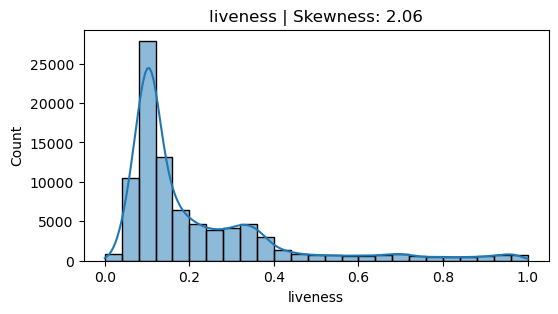

valence skewness is : 0.12763516151815052


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


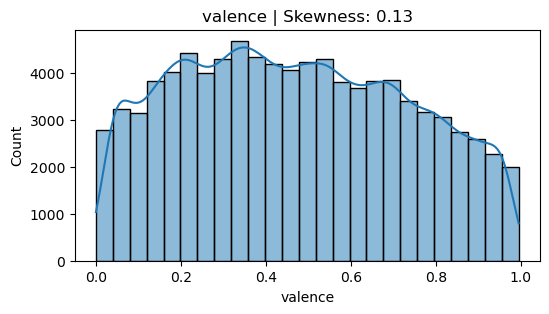

tempo skewness is : 0.18274138926956157


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


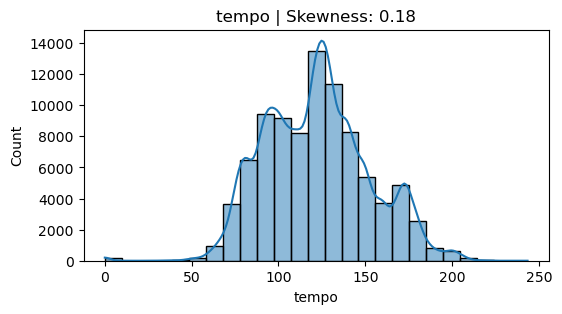

time_signature skewness is : -3.998744160790385


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


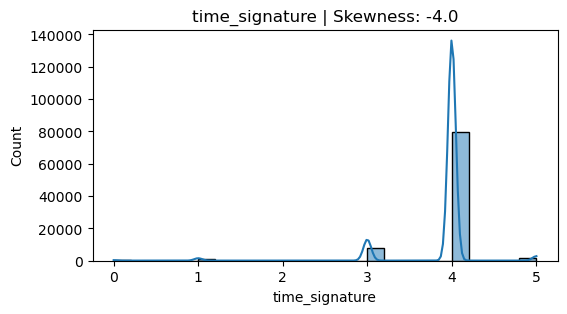

In [14]:

for feature in numerical_columns:
    dataset=newSP_Data.copy()
    print(feature, 'skewness is :', skew(dataset[feature]))
    plt.figure(figsize=(6, 3))
    sns.histplot(x=feature, data=dataset, bins=25, kde=True)
    skewness = round(newSP_Data[feature].skew(), 2)
    plt.title(f"{feature} | Skewness: {skewness}")
    plt.show()

### generating <u>correlation matrix</u>

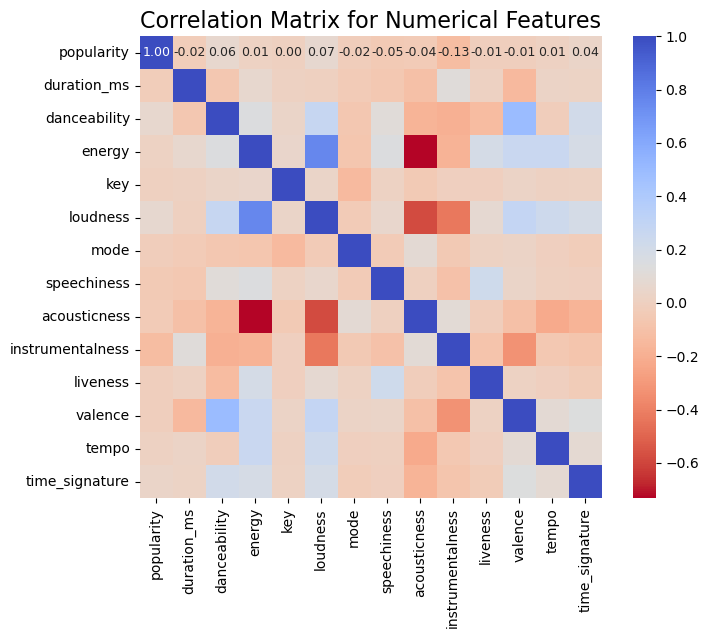

In [15]:
trackGen_cols = [i for i in newSP_Data.columns if i.startswith('track_genre_')]
categorical_cols = ['artists', 'album_name', 'track_name', 'explicit'] + trackGen_cols

corrMatrix = newSP_Data.drop(columns=categorical_cols).corr()
fig, ax = plt.subplots(figsize=(8, 6))
heatMap = sns.heatmap(corrMatrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9},
                      yticklabels= corrMatrix.columns, xticklabels= corrMatrix.columns, cmap="coolwarm_r")
ax.set_title('Correlation Matrix for Numerical Features', fontsize=16)
plt.show()

## Encoding Categorical Features

column 'explicit' type is boolean, we change it to Integer.

In [16]:
newSP_Data['explicit'] = newSP_Data['explicit'].astype(int)

**<u>Target Encoding:</u>** features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.

encoding the <u>'artists', 'album_name', and 'track_name'</u> columns based on their *'popularity'* value

In [17]:
trg_encoder = ce.TargetEncoder(cols=['artists', 'album_name', 'track_name'])
targetEncoded = trg_encoder.fit_transform(newSP_Data, newSP_Data['popularity'])
targetEncoded[['artists', 'album_name', 'track_name', 'popularity']].head()

,artists,album_name,track_name,popularity
2,36.298937,36.298937,36.298937,57
3,41.029362,38.120456,37.653397,71
4,35.666738,34.349506,37.321953,82
8,38.564294,40.097898,35.646385,74
10,44.684170,38.602552,36.010975,74


Check for duplicated COLUMNS and ROWS

In [18]:
dup_cols = targetEncoded.columns.duplicated()
if True in dup_cols:
    print('duplicated columns exist')
else:
    print('there are no duplicates')

there are no duplicates


In [19]:
duplicated_rows = targetEncoded.duplicated()
if True in duplicated_rows:
    print('duplicated rows exist')
else:
    print("there are no duplicates")

there are no duplicates


### split data to test and train with 80%-20% share

In [20]:
X_train, X_test, y_train, y_test = train_test_split(targetEncoded.drop('popularity', axis=1), targetEncoded['popularity'],
                                                    test_size=0.2, random_state=42)

### apply <u>StandardScalar</u> to the numeric features

In [21]:
numericFeatures = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

std_scaler = StandardScaler()
std_scaler.fit(X_train[numericFeatures])

X_train[numericFeatures] = std_scaler.transform(X_train[numericFeatures])
X_test[numericFeatures] = std_scaler.transform(X_test[numericFeatures])

X_train_num = X_train[numericFeatures]
X_test_num = X_test[numericFeatures]

### <u>*Ridge Regression*</u> model definition including: fitting, predictiing, evaluation, and cros validation

In [22]:
class RidgeRegression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights_ = None

    def fit(self, X, y):
        y = y.values.reshape(-1, 1) if isinstance(y, (pd.Series, pd.DataFrame)) else y.reshape(-1, 1)
        intercept = np.ones((X.shape[0], 1))
        X_with_intercept = np.hstack((intercept, X))
        XtX = X_with_intercept.T @ X_with_intercept
        Xty = X_with_intercept.T @ y
        ridge_penalty = self.alpha * np.eye(X_with_intercept.shape[1])
        ridge_penalty[0, 0] = 0
        self.weights_ = np.linalg.inv(XtX + ridge_penalty) @ Xty
        return self.weights_

    def predict(self, X):
        intercept = np.ones((X.shape[0], 1))
        X_with_intercept = np.hstack((intercept, X))
        return (X_with_intercept @ self.weights_).flatten()

    def meanSqr_error(self, predictions, targets):
        targets = targets.values.flatten() if isinstance(targets, (pd.Series, pd.DataFrame)) else np.asarray(targets).flatten()
        return np.mean((predictions - targets) ** 2)

    def R2_performance(self, predictions, targets):
        targets = targets.values.flatten() if isinstance(targets, (pd.Series, pd.DataFrame)) else np.asarray(targets).flatten()
        residual_sum_of_squares = np.sum((targets - predictions) ** 2)
        total_sum_of_squares = np.sum((targets - np.mean(targets)) ** 2)
        return 1 - (residual_sum_of_squares / total_sum_of_squares)

    def CV_Kfold(self, X, y, alpha_values, n_splits=5):
            alpha_cv_mse = {}
            kf = KFold(n_splits=n_splits)
            for alpha in alpha_values:
                cv_mse = []
                for train_index, test_index in kf.split(X):
                    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
                    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
                    self.alpha = alpha
                    self.fit(X_train_fold, y_train_fold)
                    y_pred_fold = self.predict(X_test_fold)
                    fold_mse = self.meanSqr_error(y_pred_fold, y_test_fold)
                    cv_mse.append(fold_mse)

                average_cv_mse = np.mean(cv_mse)
                alpha_cv_mse[alpha] = average_cv_mse

            return alpha_cv_mse

### apply the model on <u>Numerical Features</u>

create instance of model, then apply fit, predict, and estimate error with meanSqr_error

In [23]:
regressionNumeric = RidgeRegression()
regressionNumeric.fit(X_train_num, y_train)

pred_train_Numeric = regressionNumeric.predict(X_train_num)
pred_test_Numeric = regressionNumeric.predict(X_test_num)

mse_train_Numeric = regressionNumeric.meanSqr_error(pred_train_Numeric, y_train)
mse_test_Numeric = regressionNumeric.meanSqr_error(pred_test_Numeric, y_test)

pd.DataFrame([{'Training MSE': mse_train_Numeric, 'Test MSE': mse_test_Numeric}])

,Training MSE,Test MSE
0,408.572621,414.72511


estimate the <u>R^2</u>

In [24]:
R2_train_Numeric = regressionNumeric.R2_performance(pred_train_Numeric, y_train)
R2_test_Numeric = regressionNumeric.R2_performance(pred_test_Numeric, y_test)

pd.DataFrame([{'Training R^2': R2_train_Numeric, 'Test R^2': R2_test_Numeric}])

,Training R^2,Test R^2
0,0.032169,0.028766


### Tuning the model with different alpha values

In [25]:
alphaValues = 10**np.linspace(6, -2, 100)*0.5

trainErr_numeric, testErr_numeric = [], []
trainNumeric_R2, testNumeric_R2 = [], []

for i in alphaValues:
    ridge_model = RidgeRegression(alpha=i)
    ridge_model.fit(X_train_num, y_train)

    train_pred = ridge_model.predict(X_train_num)
    train_mse = ridge_model.meanSqr_error(train_pred, y_train)
    trainR2_numeric = ridge_model.R2_performance(train_pred, y_train)
    trainErr_numeric.append(train_mse)
    trainNumeric_R2.append(trainR2_numeric)
    
    test_pred = ridge_model.predict(X_test_num)
    test_mse = ridge_model.meanSqr_error(test_pred, y_test)
    testR2_numeric = ridge_model.R2_performance(test_pred, y_test)
    testErr_numeric.append(test_mse)
    testNumeric_R2.append(testR2_numeric)

minError_index = np.argmin(testErr_numeric)
best_numeric_alpha = alphaValues[minError_index]
pd.DataFrame([{'best alpha value': best_numeric_alpha, 'test mean sqr err.': min(testErr_numeric), 'test R2': max(testNumeric_R2)}])

,best alpha value,test mean sqr err.,test R2
0,2731.138609,414.679694,0.028873


### Performance plots for the <u>numerical dataset model</u>

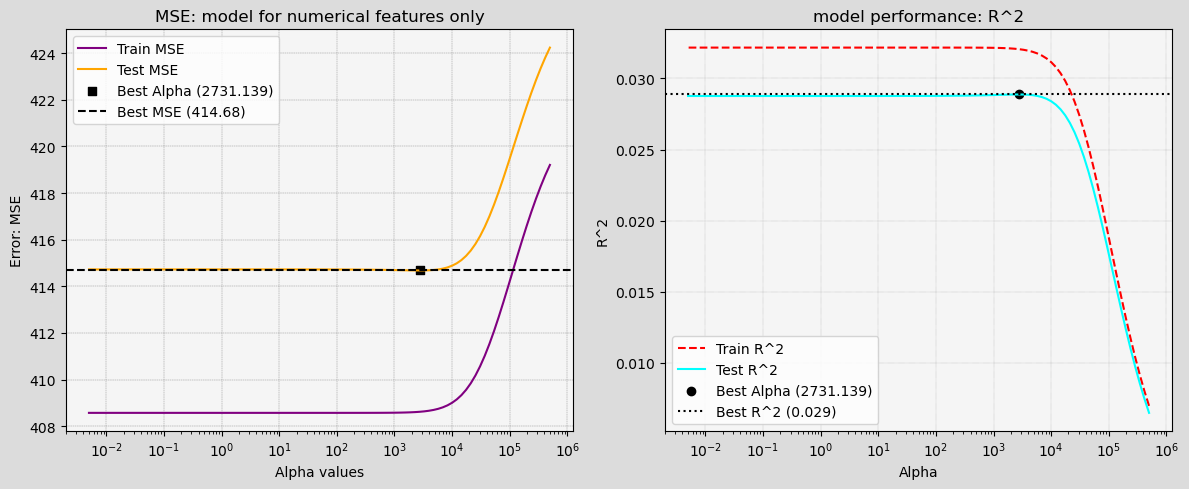

In [26]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), facecolor='gainsboro')

# Set a white background
ax1.set_facecolor('whitesmoke')
ax2.set_facecolor('whitesmoke')

# Plot MSE
ax1.plot(alphaValues, trainErr_numeric, label='Train MSE', color='purple', linestyle='-')
ax1.plot(alphaValues, testErr_numeric, label='Test MSE', color='orange', linestyle='-')
ax1.scatter(best_numeric_alpha, min(testErr_numeric), color='black', label=f'Best Alpha ({round(best_numeric_alpha, 3)})', marker='s')
ax1.axhline(y=min(testErr_numeric), color='black', linestyle='--', label=f'Best MSE ({round(min(testErr_numeric), 3)})')
ax1.set_xlabel('Alpha values')
ax1.set_ylabel('Error: MSE')
ax1.set_title('MSE: model for numerical features only')
ax1.set_xscale('log')  # Set log scale for better visualization of alpha values
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='--', linewidth=0.3)

# Plot R^2
ax2.plot(alphaValues, trainNumeric_R2, label='Train R^2', color='red', linestyle='--')
ax2.plot(alphaValues, testNumeric_R2, label='Test R^2', color='cyan', linestyle='-')
ax2.scatter(best_numeric_alpha, max(testNumeric_R2), color='black', label=f'Best Alpha ({round(best_numeric_alpha, 3)})', marker='o')
ax2.axhline(y=max(testNumeric_R2), color='black', linestyle=':', label=f'Best R^2 ({(round(max(testNumeric_R2), 3))})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('model performance: R^2')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle=':', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### The <u>"only numerical features"</u> dataset performed weak with the best ***R^2 score of 0.029***

### applying 5-fold cross validation on the numerical dataset

In [27]:
# Initialize RidgeRegression with the default alpha value
ridge_cv_num = RidgeRegression()

# Perform k-fold cross-validationd
alpha_cv_results_num = ridge_cv_num.CV_Kfold(X_train_num, y_train, alphaValues)

cv_best_alpha_num = min(alpha_cv_results_num, key=alpha_cv_results_num.get)
cv_best_mse_num = alpha_cv_results_num[cv_best_alpha_num]

print("Best CV alpha value for Numerical dataset:", cv_best_alpha_num)
print("Corresponding average MSE:", cv_best_mse_num)

Best CV alpha value for Numerical dataset: 243.1300790032674
Corresponding average MSE: 408.7355873231753


### <u>Target Encoded Dataset</u> modeling

In [28]:
ridge = RidgeRegression()
ridge.fit(X_train, y_train)

predictions_train = ridge.predict(X_train) 
predictions_test = ridge.predict(X_test)

mse_train = ridge.meanSqr_error(predictions_train, y_train) 
mse_test = ridge.meanSqr_error(predictions_test, y_test)

pd.DataFrame([{'Training MSE': mse_train, 'Test MSE': mse_test}])

,Training MSE,Test MSE
0,82.276617,84.454668


In [29]:
rsquared_train = ridge.R2_performance(predictions_train, y_train) 
rsquared_test = ridge.R2_performance(predictions_test, y_test)

pd.DataFrame([{'Training R^2': rsquared_train, 'Test R^2': rsquared_test}])

,Training R^2,Test R^2
0,0.805102,0.802218


find best performing model with alpha tuning

In [30]:
trainErr_trgEncoded, testErr_trgEncoded = [], []
trainR2_trgEncoded, testR2_trgEncoded = [], []

for i in alphaValues:
    model = RidgeRegression(alpha=i)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_mse = model.meanSqr_error(train_pred, y_train)
    train_R_2 = model.R2_performance(train_pred, y_train)
    trainErr_trgEncoded.append(train_mse)
    trainR2_trgEncoded.append(train_R_2)
    
    test_pred = model.predict(X_test)
    test_mse = model.meanSqr_error(test_pred, y_test)
    test_R_2 = model.R2_performance(test_pred, y_test)
    testErr_trgEncoded.append(test_mse)
    testR2_trgEncoded.append(test_R_2)

In [31]:
idx_min = np.argmin(testErr_trgEncoded)
best_alpha = alphaValues[idx_min]
pd.DataFrame([{'best alpha value': best_alpha, 'test mean sqr err.': min(testErr_trgEncoded), 'test R2': max(testR2_trgEncoded)}])


,best alpha value,test mean sqr err.,test R2
0,4.88505,84.452872,0.802222


### Performance plots for the <u>Target Encoded dataset</u>

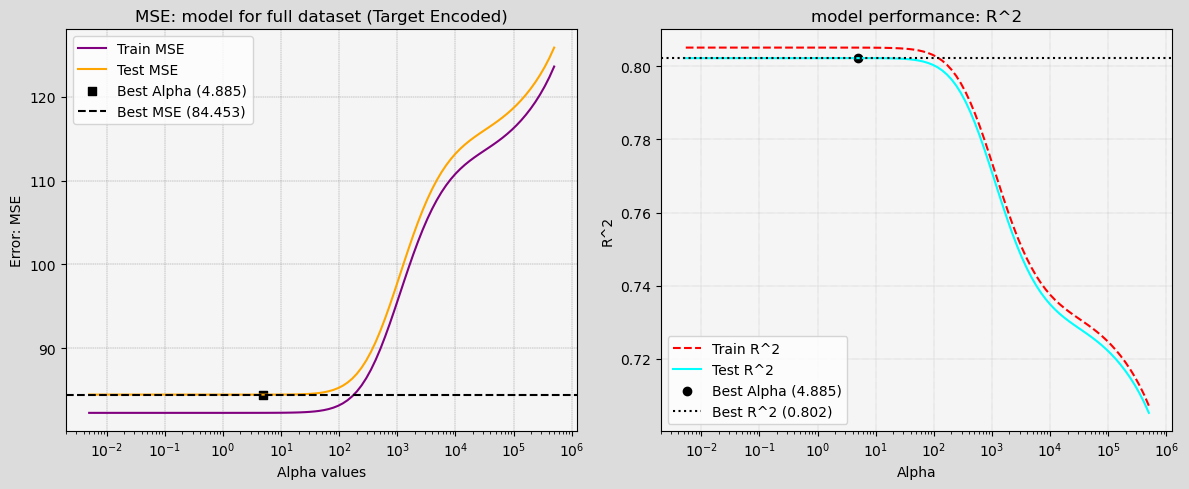

In [32]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), facecolor='gainsboro')

# Set a white background
ax1.set_facecolor('whitesmoke')
ax2.set_facecolor('whitesmoke')

# Plot MSE
ax1.plot(alphaValues, trainErr_trgEncoded, label='Train MSE', color='purple', linestyle='-')
ax1.plot(alphaValues, testErr_trgEncoded, label='Test MSE', color='orange', linestyle='-')
ax1.scatter(best_alpha, min(testErr_trgEncoded), color='black', label=f'Best Alpha ({round(best_alpha, 3)})', marker='s')
ax1.axhline(y=min(testErr_trgEncoded), color='black', linestyle='--', label=f'Best MSE ({round(min(testErr_trgEncoded), 3)})')
ax1.set_xlabel('Alpha values')
ax1.set_ylabel('Error: MSE')
ax1.set_title('MSE: model for full dataset (Target Encoded)')
ax1.set_xscale('log')  # Set log scale for better visualization of alpha values
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='--', linewidth=0.3)

# Plot R^2
ax2.plot(alphaValues, trainR2_trgEncoded, label='Train R^2', color='red', linestyle='--')
ax2.plot(alphaValues, testR2_trgEncoded, label='Test R^2', color='cyan', linestyle='-')
ax2.scatter(best_alpha, max(testR2_trgEncoded), color='black', label=f'Best Alpha ({round(best_alpha, 3)})', marker='o')
ax2.axhline(y=max(testR2_trgEncoded), color='black', linestyle=':', label=f'Best R^2 ({(round(max(testR2_trgEncoded), 3))})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('model performance: R^2')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle=':', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Much higher ***<u>R^2 [0.802]</u>*** when modeling on full dataset (in this case Target Encoded for the categorical features)

### applying 5-fold cross validation on the Target Encoded dataset

In [33]:
ridge_cv_target = RidgeRegression()

alpha_cv_results_target = ridge_cv_target.CV_Kfold(X_train, y_train, alphaValues)

cv_best_alpha_target = min(alpha_cv_results_target, key=alpha_cv_results_target.get)
cv_best_mse_target = alpha_cv_results_target[cv_best_alpha_target]

print("Best CV alpha value for Target encoded dataset:", cv_best_alpha_target)
print("Corresponding average MSE:", cv_best_mse_target)

Best CV alpha value for Target encoded dataset: 2.320794416806386
Corresponding average MSE: 82.64603530688578


### Exploring modeling results with <u>other encoding methods</u>

### Frequency Encoding

In [34]:
count_encoder = ce.CountEncoder(cols=['artists', 'album_name', 'track_name'])
data_countEncoded = count_encoder.fit_transform(newSP_Data)

In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_countEncoded.drop('popularity', axis=1), data_countEncoded['popularity'],
                                                        test_size=0.2, random_state=42) 

In [36]:
scaler = StandardScaler()

X_train1[numericFeatures] = scaler.fit_transform(X_train1[numericFeatures]) 
X_test1[numericFeatures] = scaler.transform(X_test1[numericFeatures]) 

fit model

In [37]:
countEncode_ridge = RidgeRegression()  
countEncode_ridge.fit(X_train1, y_train1)

count_train_pred = countEncode_ridge.predict(X_train1) 
count_test_pred = countEncode_ridge.predict(X_test1)

count_mse_train = countEncode_ridge.meanSqr_error(count_train_pred, y_train1) 
count_mse_test = countEncode_ridge.meanSqr_error(count_test_pred, y_test1)

pd.DataFrame([{'Training MSE': count_mse_train, 'Test MSE': count_mse_test}])

,Training MSE,Test MSE
0,228.302945,233.161276


In [38]:
count_R2_train = countEncode_ridge.R2_performance(count_train_pred, y_train1) 
count_R2_test = countEncode_ridge.R2_performance(count_test_pred, y_test1) 

pd.DataFrame([{'Training R^2': count_R2_train, 'Test R^2': count_R2_test}])

,Training R^2,Test R^2
0,0.459194,0.453966


Tunning

In [39]:
trainErr_cntEncoded, testErr_cntEncoded = [], []
trainR2_cntEncoded, testR2_cntEncoded = [], []

for i in alphaValues:
    model = RidgeRegression(alpha=i)
    model.fit(X_train1, y_train1)
    
    train_pred = model.predict(X_train1)
    train_mse = model.meanSqr_error(train_pred, y_train1)
    train_R_2 = model.R2_performance(train_pred, y_train1)
    trainErr_cntEncoded.append(train_mse)
    trainR2_cntEncoded.append(train_R_2)
    
    test_pred = model.predict(X_test1)
    test_mse = model.meanSqr_error(test_pred, y_test1)
    test_R_2 = model.R2_performance(test_pred, y_test1)
    testErr_cntEncoded.append(test_mse)
    testR2_cntEncoded.append(test_R_2)

In [40]:
count_idx_min = np.argmin(testErr_cntEncoded)
count_best_alpha = alphaValues[count_idx_min]
pd.DataFrame([{'best alpha value': count_best_alpha, 'test mean sqr err.': min(testErr_cntEncoded), 'test R2': max(testR2_cntEncoded)}])

,best alpha value,test mean sqr err.,test R2
0,5.88406,233.154019,0.453983


### Frequency Encoded Plot

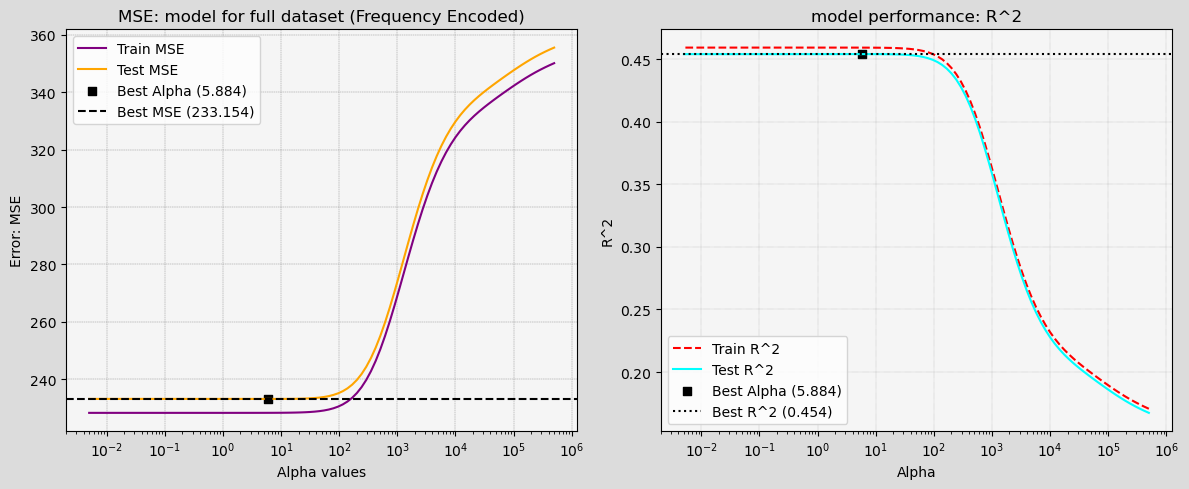

In [41]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), facecolor='gainsboro')

# Set a white background
ax1.set_facecolor('whitesmoke')
ax2.set_facecolor('whitesmoke')

# Plot MSE
ax1.plot(alphaValues, trainErr_cntEncoded, label='Train MSE', color='purple', linestyle='-')
ax1.plot(alphaValues, testErr_cntEncoded, label='Test MSE', color='orange', linestyle='-')
ax1.scatter(count_best_alpha, min(testErr_cntEncoded), color='black', label=f'Best Alpha ({round(count_best_alpha, 3)})', marker='s')
ax1.axhline(y=min(testErr_cntEncoded), color='black', linestyle='--', label=f'Best MSE ({round(min(testErr_cntEncoded), 3)})')
ax1.set_xlabel('Alpha values')
ax1.set_ylabel('Error: MSE')
ax1.set_title('MSE: model for full dataset (Frequency Encoded)')
ax1.set_xscale('log')  # Set log scale for better visualization of alpha values
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='--', linewidth=0.3)

# Plot R^2
ax2.plot(alphaValues, trainR2_cntEncoded, label='Train R^2', color='red', linestyle='--')
ax2.plot(alphaValues, testR2_cntEncoded, label='Test R^2', color='cyan', linestyle='-')
ax2.scatter(count_best_alpha, max(testR2_cntEncoded), color='black', label=f'Best Alpha ({round(count_best_alpha, 3)})', marker='s')
ax2.axhline(y=max(testR2_cntEncoded), color='black', linestyle=':', label=f'Best R^2 ({(round(max(testR2_cntEncoded), 3))})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('model performance: R^2')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle=':', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Cross Validation

In [42]:
ridge_cv_countEncoded = RidgeRegression()
alpha_cv_results_countEncoded = ridge_cv_countEncoded.CV_Kfold(X_train1, y_train1, alphaValues)
cv_best_alpha_countEncoded = min(alpha_cv_results_countEncoded, key=alpha_cv_results_countEncoded.get)
cv_best_mse_countEncoded = alpha_cv_results_countEncoded[cv_best_alpha_countEncoded]

print("Best CV alpha value for Frequency encoded dataset:", cv_best_alpha_countEncoded)
print("Corresponding average MSE:", cv_best_mse_countEncoded)

Best CV alpha value for Frequency encoded dataset: 2.320794416806386
Corresponding average MSE: 229.19733194607497


### Encoding with Leave-One-Out Method

In [43]:
leave_1_outEncoder = ce.LeaveOneOutEncoder(cols=['artists', 'album_name', 'track_name'])
data_leave_1_out = leave_1_outEncoder.fit_transform(newSP_Data, newSP_Data['popularity'])

In [44]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_leave_1_out.drop('popularity', axis=1), data_leave_1_out['popularity'],
                                                        test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()

X_train2[numericFeatures] = scaler.fit_transform(X_train2[numericFeatures]) 
X_test2[numericFeatures] = scaler.transform(X_test2[numericFeatures]) 

model with leave one out data

In [46]:
leaveOne_out_ridge = RidgeRegression()  
leaveOne_out_ridge.fit(X_train2, y_train2)

leaveOne_out_train_pred = leaveOne_out_ridge.predict(X_train2) 
leaveOne_out_test_pred = leaveOne_out_ridge.predict(X_test2)

leaveOne_out_mse_train = leaveOne_out_ridge.meanSqr_error(leaveOne_out_train_pred, y_train2) 
leaveOne_out_mse_test = leaveOne_out_ridge.meanSqr_error(leaveOne_out_test_pred, y_test2)

pd.DataFrame([{'Training MSE': leaveOne_out_mse_train, 'Test MSE': leaveOne_out_mse_test}])

,Training MSE,Test MSE
0,124.44713,129.145382


In [47]:
leaveOne_out_rsquared_train = leaveOne_out_ridge.R2_performance(leaveOne_out_train_pred, y_train2) 
leaveOne_out_rsquared_test = leaveOne_out_ridge.R2_performance(leaveOne_out_test_pred, y_test2)

pd.DataFrame([{'Training R^2': leaveOne_out_rsquared_train, 'Test R^2': leaveOne_out_rsquared_test}])

,Training R^2,Test R^2
0,0.705208,0.697558


Tuning

In [48]:
leaveOne_out_train_errors, leaveOne_out_test_errors = [], []
leaveOne_out_train_rsquared, leaveOne_out_test_rsquared = [], []

for i in alphaValues:
    model = RidgeRegression(alpha=i)
    model.fit(X_train2, y_train2)
    
    train_pred = model.predict(X_train2)
    train_mse = model.meanSqr_error(train_pred, y_train2)
    train_R_2 = model.R2_performance(train_pred, y_train2)
    leaveOne_out_train_errors.append(train_mse)
    leaveOne_out_train_rsquared.append(train_R_2)
    
    test_pred = model.predict(X_test2)
    test_mse = model.meanSqr_error(test_pred, y_test2)
    test_R_2 = model.R2_performance(test_pred, y_test2)
    leaveOne_out_test_errors.append(test_mse)
    leaveOne_out_test_rsquared.append(test_R_2)

In [49]:
leaveOne_out_idx_min = np.argmin(leaveOne_out_test_errors)
leaveOne_out_best_alpha = alphaValues[leaveOne_out_idx_min]

pd.DataFrame([{'best alpha value': leaveOne_out_best_alpha,
               'test mean sqr err.': min(leaveOne_out_test_errors),
               'test R2': max(leaveOne_out_test_rsquared)}])

,best alpha value,test mean sqr err.,test R2
0,7.087371,129.142581,0.697564


### Leave One Out Plots

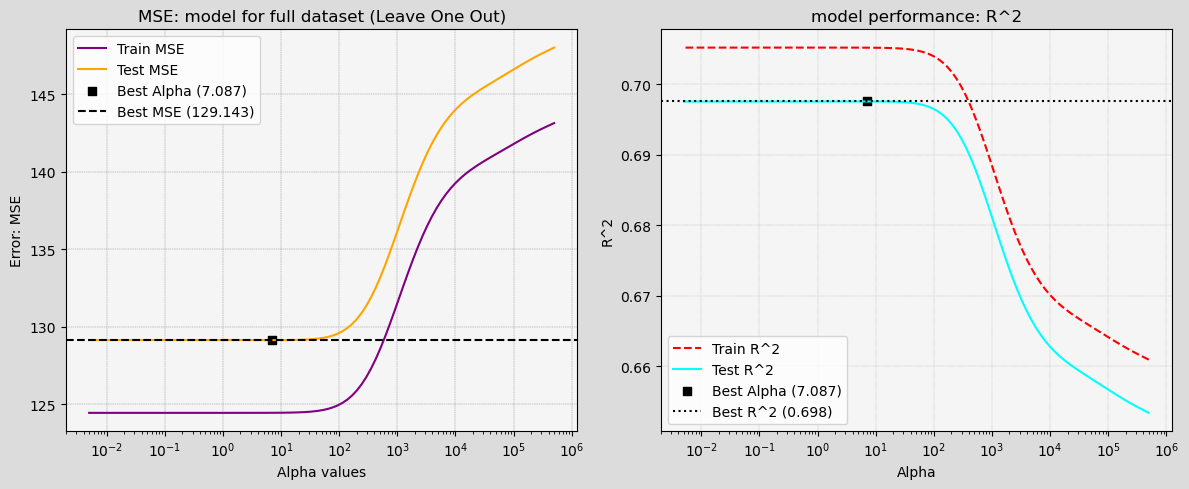

In [50]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), facecolor='gainsboro')

# Set a white background
ax1.set_facecolor('whitesmoke')
ax2.set_facecolor('whitesmoke')

# Plot MSE
ax1.plot(alphaValues, leaveOne_out_train_errors, label='Train MSE', color='purple', linestyle='-')
ax1.plot(alphaValues, leaveOne_out_test_errors, label='Test MSE', color='orange', linestyle='-')
ax1.scatter(leaveOne_out_best_alpha, min(leaveOne_out_test_errors),
            color='black', label=f'Best Alpha ({round(leaveOne_out_best_alpha, 3)})', marker='s')
ax1.axhline(y=min(leaveOne_out_test_errors), color='black', linestyle='--',
            label=f'Best MSE ({round(min(leaveOne_out_test_errors), 3)})')
ax1.set_xlabel('Alpha values')
ax1.set_ylabel('Error: MSE')
ax1.set_title('MSE: model for full dataset (Leave One Out)')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='--', linewidth=0.3)

# Plot R^2
ax2.plot(alphaValues, leaveOne_out_train_rsquared, label='Train R^2', color='red', linestyle='--')
ax2.plot(alphaValues, leaveOne_out_test_rsquared, label='Test R^2', color='cyan', linestyle='-')
ax2.scatter(leaveOne_out_best_alpha, max(leaveOne_out_test_rsquared),
            color='black', label=f'Best Alpha ({round(leaveOne_out_best_alpha, 3)})', marker='s')
ax2.axhline(y=max(leaveOne_out_test_rsquared), color='black', linestyle=':',
            label=f'Best R^2 ({(round(max(leaveOne_out_test_rsquared), 3))})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('model performance: R^2')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle=':', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Cross Validation

In [51]:
leaveOne_out_CV = RidgeRegression()
alphaCV_leaveOne_out = leaveOne_out_CV.CV_Kfold(X_train2, y_train2, alphaValues)

leaveOne_out_CV_bestAlpha = min(alphaCV_leaveOne_out, key=alphaCV_leaveOne_out.get)
leaveOne_out_mse_CV_bestAlpha = alphaCV_leaveOne_out[leaveOne_out_CV_bestAlpha]

print("Best CV alpha value for Leave-One-Out encoded dataset:", leaveOne_out_CV_bestAlpha)
print("Corresponding average MSE:", leaveOne_out_mse_CV_bestAlpha)

Best CV alpha value for Leave-One-Out encoded dataset: 4.885049786496123
Corresponding average MSE: 124.97313692784192


### Comparisons

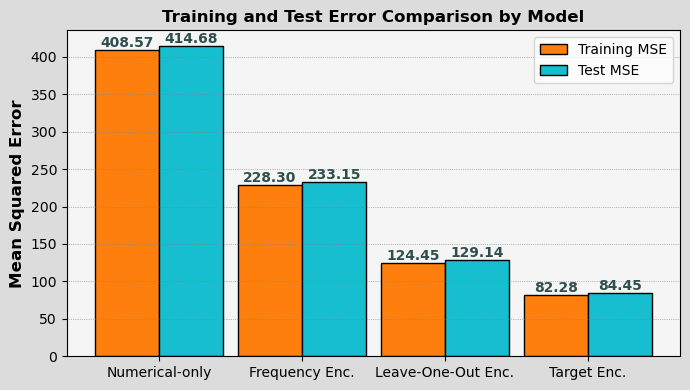

In [52]:
# Model and error data
models = ['Numerical-only',  'Frequency Enc.', 'Leave-One-Out Enc.', 'Target Enc.']
training_mses = [min(trainErr_numeric), min(trainErr_cntEncoded), min(leaveOne_out_train_errors), min(trainErr_trgEncoded)]
test_mses = [min(testErr_numeric), min(testErr_cntEncoded), min(leaveOne_out_test_errors), min(testErr_trgEncoded)]

bar_width = 0.45
bar_positions = range(len(models))
bar_positions_test = [bar + bar_width for bar in bar_positions]

fig, ax = plt.subplots(figsize=(7, 4), facecolor='gainsboro')

training_bars = ax.bar(bar_positions, training_mses, color='tab:orange', width=bar_width, edgecolor='black', label='Training MSE')
test_bars = ax.bar(bar_positions_test, test_mses, color='tab:cyan', width=bar_width, edgecolor='black', label='Test MSE')

ax.set_ylabel('Mean Squared Error', fontsize=12, fontweight='bold')
ax.set_title('Training and Test Error Comparison by Model', fontsize=12, fontweight='bold')
ax.set_xticks([bar + bar_width / 2 for bar in range(len(models))])
ax.set_xticklabels(models, ha="center")
ax.legend()
ax.set_facecolor('whitesmoke')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5, axis='y')

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
                va='bottom', ha='center', fontweight='bold', color='darkslategray')

add_value_labels(training_bars)
add_value_labels(test_bars)

plt.tight_layout()
plt.show()

Training and Test R^2 Comparison

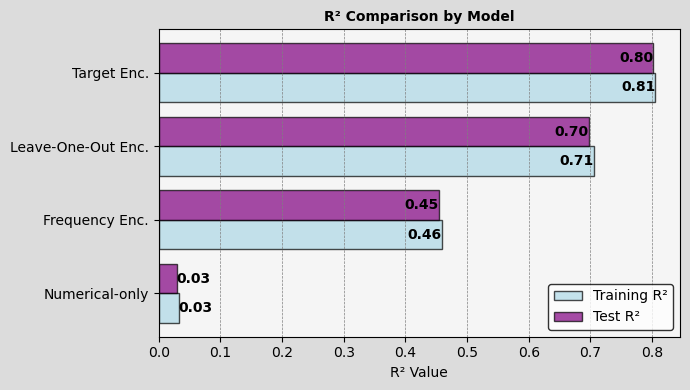

In [53]:
# Data setup
models = ['Numerical-only', 'Frequency Enc.', 'Leave-One-Out Enc.', 'Target Enc.']
training_r_squared = [max(trainNumeric_R2), max(trainR2_cntEncoded), max(leaveOne_out_train_rsquared), max(trainR2_trgEncoded)]
test_r_squared = [max(testNumeric_R2), max(testR2_cntEncoded), max(leaveOne_out_test_rsquared), max(testR2_trgEncoded)]

bar_width = 0.4
y_positions = np.arange(len(models))
fig, ax = plt.subplots(figsize=(7, 4), facecolor='gainsboro')

training_bars = ax.barh(y_positions, training_r_squared, height=bar_width, color='lightblue', edgecolor='black', label='Training R²', alpha=0.7)
test_bars = ax.barh(y_positions + bar_width, test_r_squared, height=bar_width, color='purple', edgecolor='black', label='Test R²', alpha=0.7)

ax.set_xlabel('R² Value', fontsize=10)
ax.set_title('R² Comparison by Model', fontsize=10, fontweight='bold')
ax.set_yticks(y_positions + bar_width / 2)
ax.set_yticklabels(models, fontsize=10)
ax.legend(edgecolor='black')

ax.set_facecolor('whitesmoke')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', axis='x')

def add_value_labels(bars):
    for bar in bars:
        if bar.get_width()<0.04:
            h_Loc = 'left'
        else:
            h_Loc = 'right'
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
                va='center', ha=h_Loc, color='black', fontweight='bold')

add_value_labels(training_bars)
add_value_labels(test_bars)
plt.tight_layout()
plt.show()

Comparison of cross validation results

C:\Users\ad1047\AppData\Local\Temp\ipykernel_12860\958014610.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


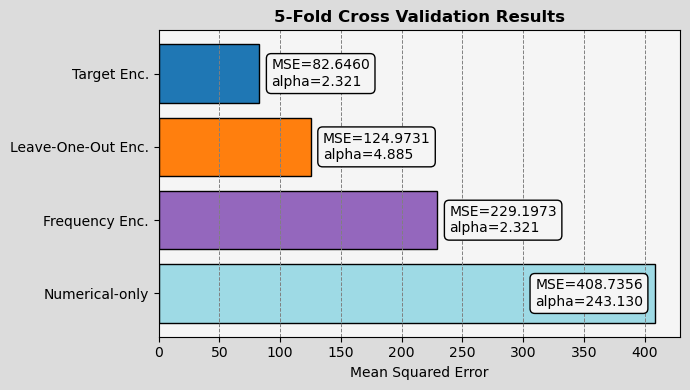

In [54]:
models = ['Numerical-only', 'Frequency Enc.', 'Leave-One-Out Enc.', 'Target Enc.']
cv_scores = [cv_best_mse_num, cv_best_mse_countEncoded, leaveOne_out_mse_CV_bestAlpha, cv_best_mse_target]
alphaValues = [cv_best_alpha_num, cv_best_alpha_countEncoded, leaveOne_out_CV_bestAlpha, cv_best_alpha_target]

# Normalize cv_scores
norm = Normalize(vmin=min(cv_scores), vmax=max(cv_scores))
cmap = cm.get_cmap('tab20')

fig, ax = plt.subplots(figsize=(7, 4), facecolor='gainsboro', edgecolor='black')
bars = ax.barh(models, cv_scores, color=cmap(norm(cv_scores)), edgecolor='black')
ax.set_xlabel('Mean Squared Error')
ax.set_title('5-Fold Cross Validation Results', fontweight='bold')

offset = 10
for i, bar in enumerate(bars):
    if cv_scores[i]<300:
        haLoc = 'left'
        x_position = bar.get_width() + offset
    else:
        haLoc = 'right'
        x_position = bar.get_width() - offset
    ax.text(x_position, bar.get_y() + bar.get_height()/2, 
            f'MSE={cv_scores[i]:.4f}\nalpha={alphaValues[i]:.3f}', 
            ha=haLoc, va='center', color='black', fontsize=10,
            bbox=dict(facecolor='whitesmoke', edgecolor='black', boxstyle='round,pad=0.35'))

ax.set_facecolor('whitesmoke')
ax.grid(visible=True, color='grey', linestyle='--', linewidth=0.7, axis='x') 
plt.tight_layout()
plt.show()
